# A comparison of different machine learning techniques used to predict customers' attrition

In this project,machine learning-based classifiers are developed to predict customers' attrition. The data set which is provided in the  course "Deep Learning A-Z 2023: Neural Networks, AI & ChatGPT Prize
" contains details of a bank's customers and the target variable is a binary variable indicating that whether or not the particular customer left the bank (closed his account). The features used to create machine learning 's models is defined as follows:
* Credit Score
* Geography : the country where the  customer lives
* Gender
* Age
* Tenure: the length of time for which the account is valid or active. 
* Balance
* Number Of Products: products means that saving Chequing accounts and customers credit account
* HasCrCard: whether or not the customer has credit cart
* IsActiveMember: whether or not the customer logged onto online banking or have any transactions
* Estimated Salary


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
import seaborn as sns
import tensorflow as tf
%matplotlib inline

# Read and Analyze the Data
* Reading the Churn_Modelling .csv file and calling it  Data
* Creating a jointplots showing Balance versus Age and CreditScore versus Age
* Creating a jointplots showing the kde distributions of EstimatedSalary versus Age , CreditScore versus Age,CreditScore versus EstimatedSalary  

In [4]:
Data = pd.read_csv('C:\homa\python\Machine Learning A-Z (Codes and Datasets)\Part 8 - Deep Learning\Section 39 - Artificial Neural Networks (ANN)\Python\Churn_Modelling.csv')
X = Data.iloc[:, 3:-1].values
y = Data.iloc[:, -1].values

In [5]:
Data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
Data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

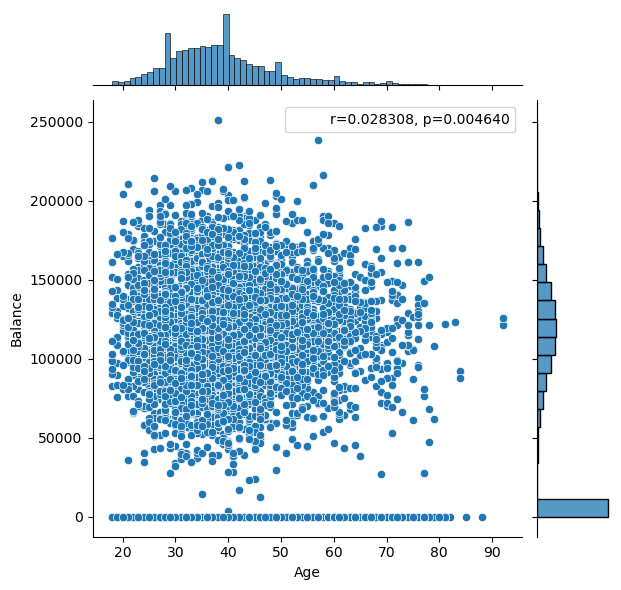

In [8]:
import scipy.stats as stats
graph = sns.jointplot(data=Data, x=Data['Age'], y=Data['Balance'])
r, p = stats.pearsonr(Data['Age'],Data['Balance'])
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])


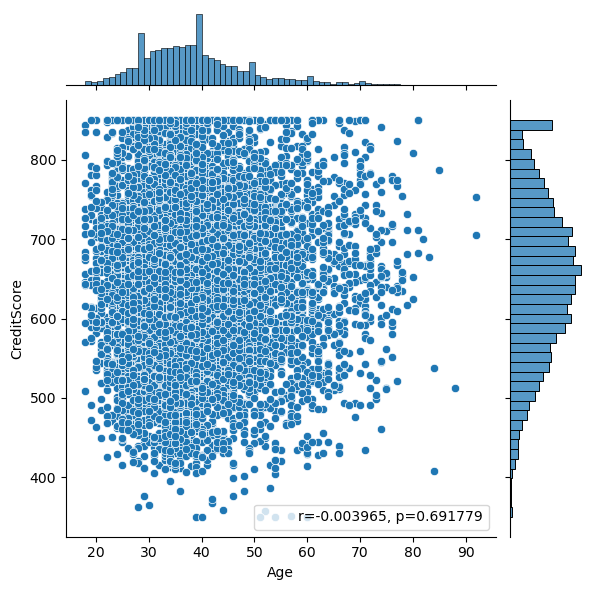

In [9]:
import scipy.stats as stats
graph = sns.jointplot(data=Data, x=Data['Age'], y=Data['CreditScore'])
r, p = stats.pearsonr(Data['Age'],Data['CreditScore'])
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])


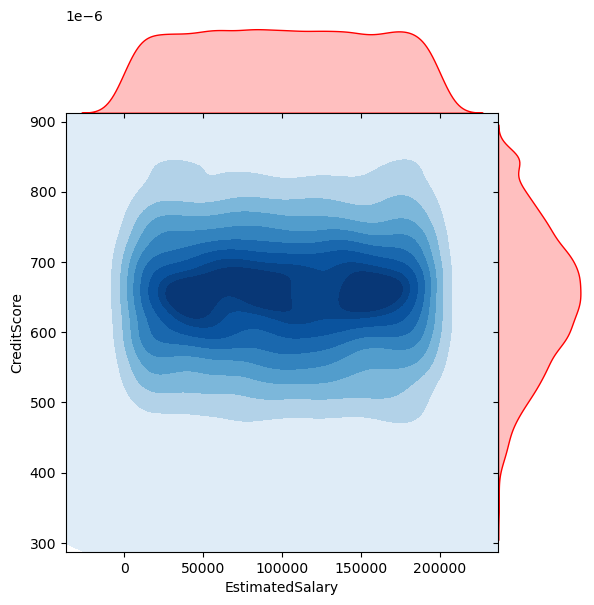

In [10]:

sns.jointplot(x='EstimatedSalary',y='CreditScore',data=Data,color='red',kind='kde', space=0, fill=True, thresh=0, cmap='Blues');
plt.show() 


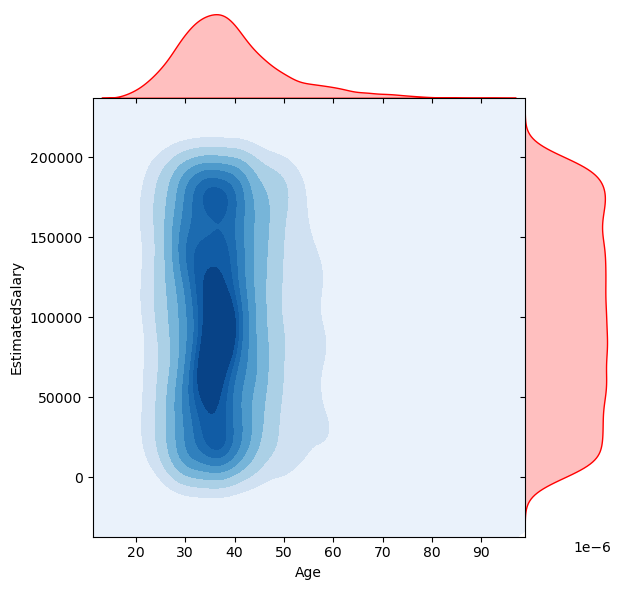

In [11]:

sns.jointplot(x='Age',y='EstimatedSalary',data=Data,color='red',kind='kde', space=0, fill=True, thresh=0, cmap='Blues');
plt.show() 


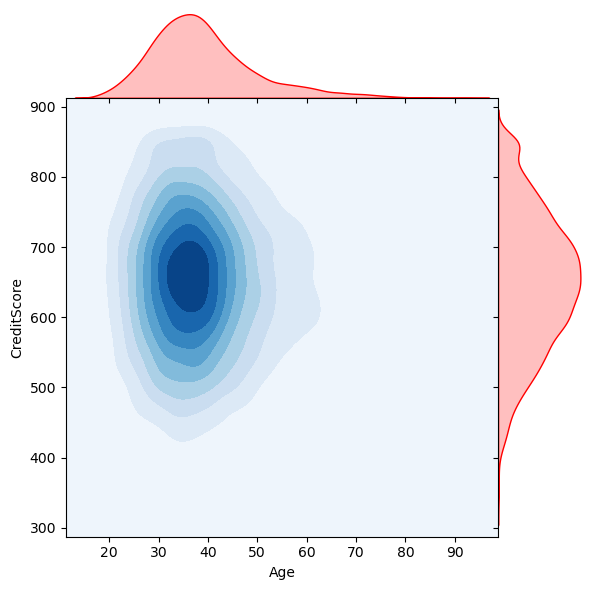

In [12]:


sns.jointplot(x='Age',y='CreditScore',data=Data,color='red',kind='kde', space=0, fill=True, thresh=0, cmap='Blues');
plt.show() 

Text(0.5, 0, 'Age')

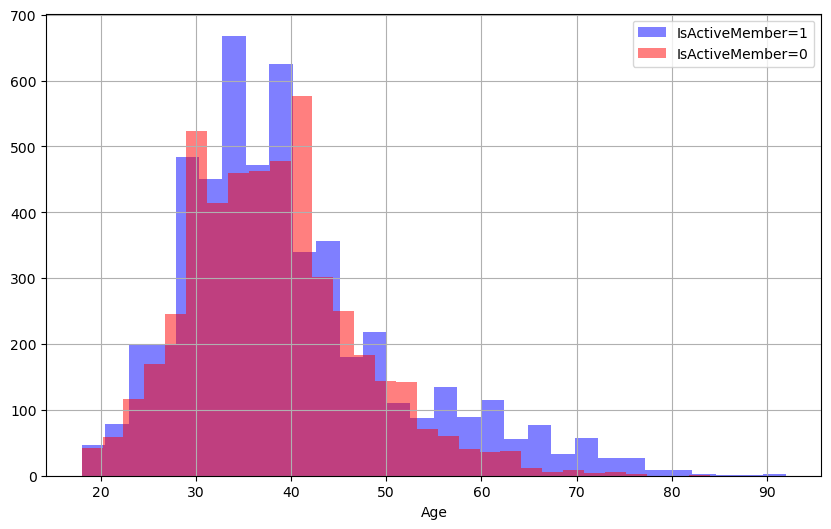

In [13]:
plt.figure(figsize=(10,6))
Data[Data['IsActiveMember']==1]['Age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='IsActiveMember=1')
Data[Data['IsActiveMember']==0]['Age'].hist(alpha=0.5,color='red',
                                              bins=30,label='IsActiveMember=0')
plt.legend()
plt.xlabel('Age')

Text(0.5, 0, 'Age')

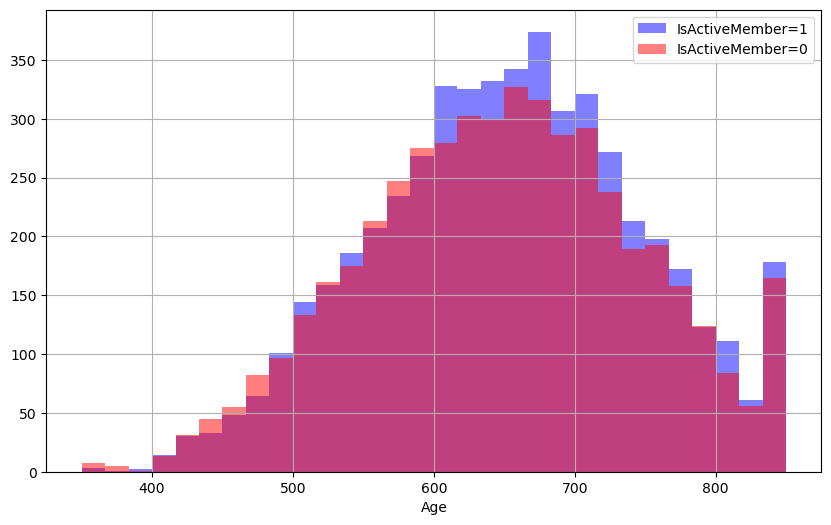

In [14]:
plt.figure(figsize=(10,6))
Data[Data['IsActiveMember']==1]['CreditScore'].hist(alpha=0.5,color='blue',
                                              bins=30,label='IsActiveMember=1')
Data[Data['IsActiveMember']==0]['CreditScore'].hist(alpha=0.5,color='red',
                                              bins=30,label='IsActiveMember=0')
plt.legend()
plt.xlabel('Age')

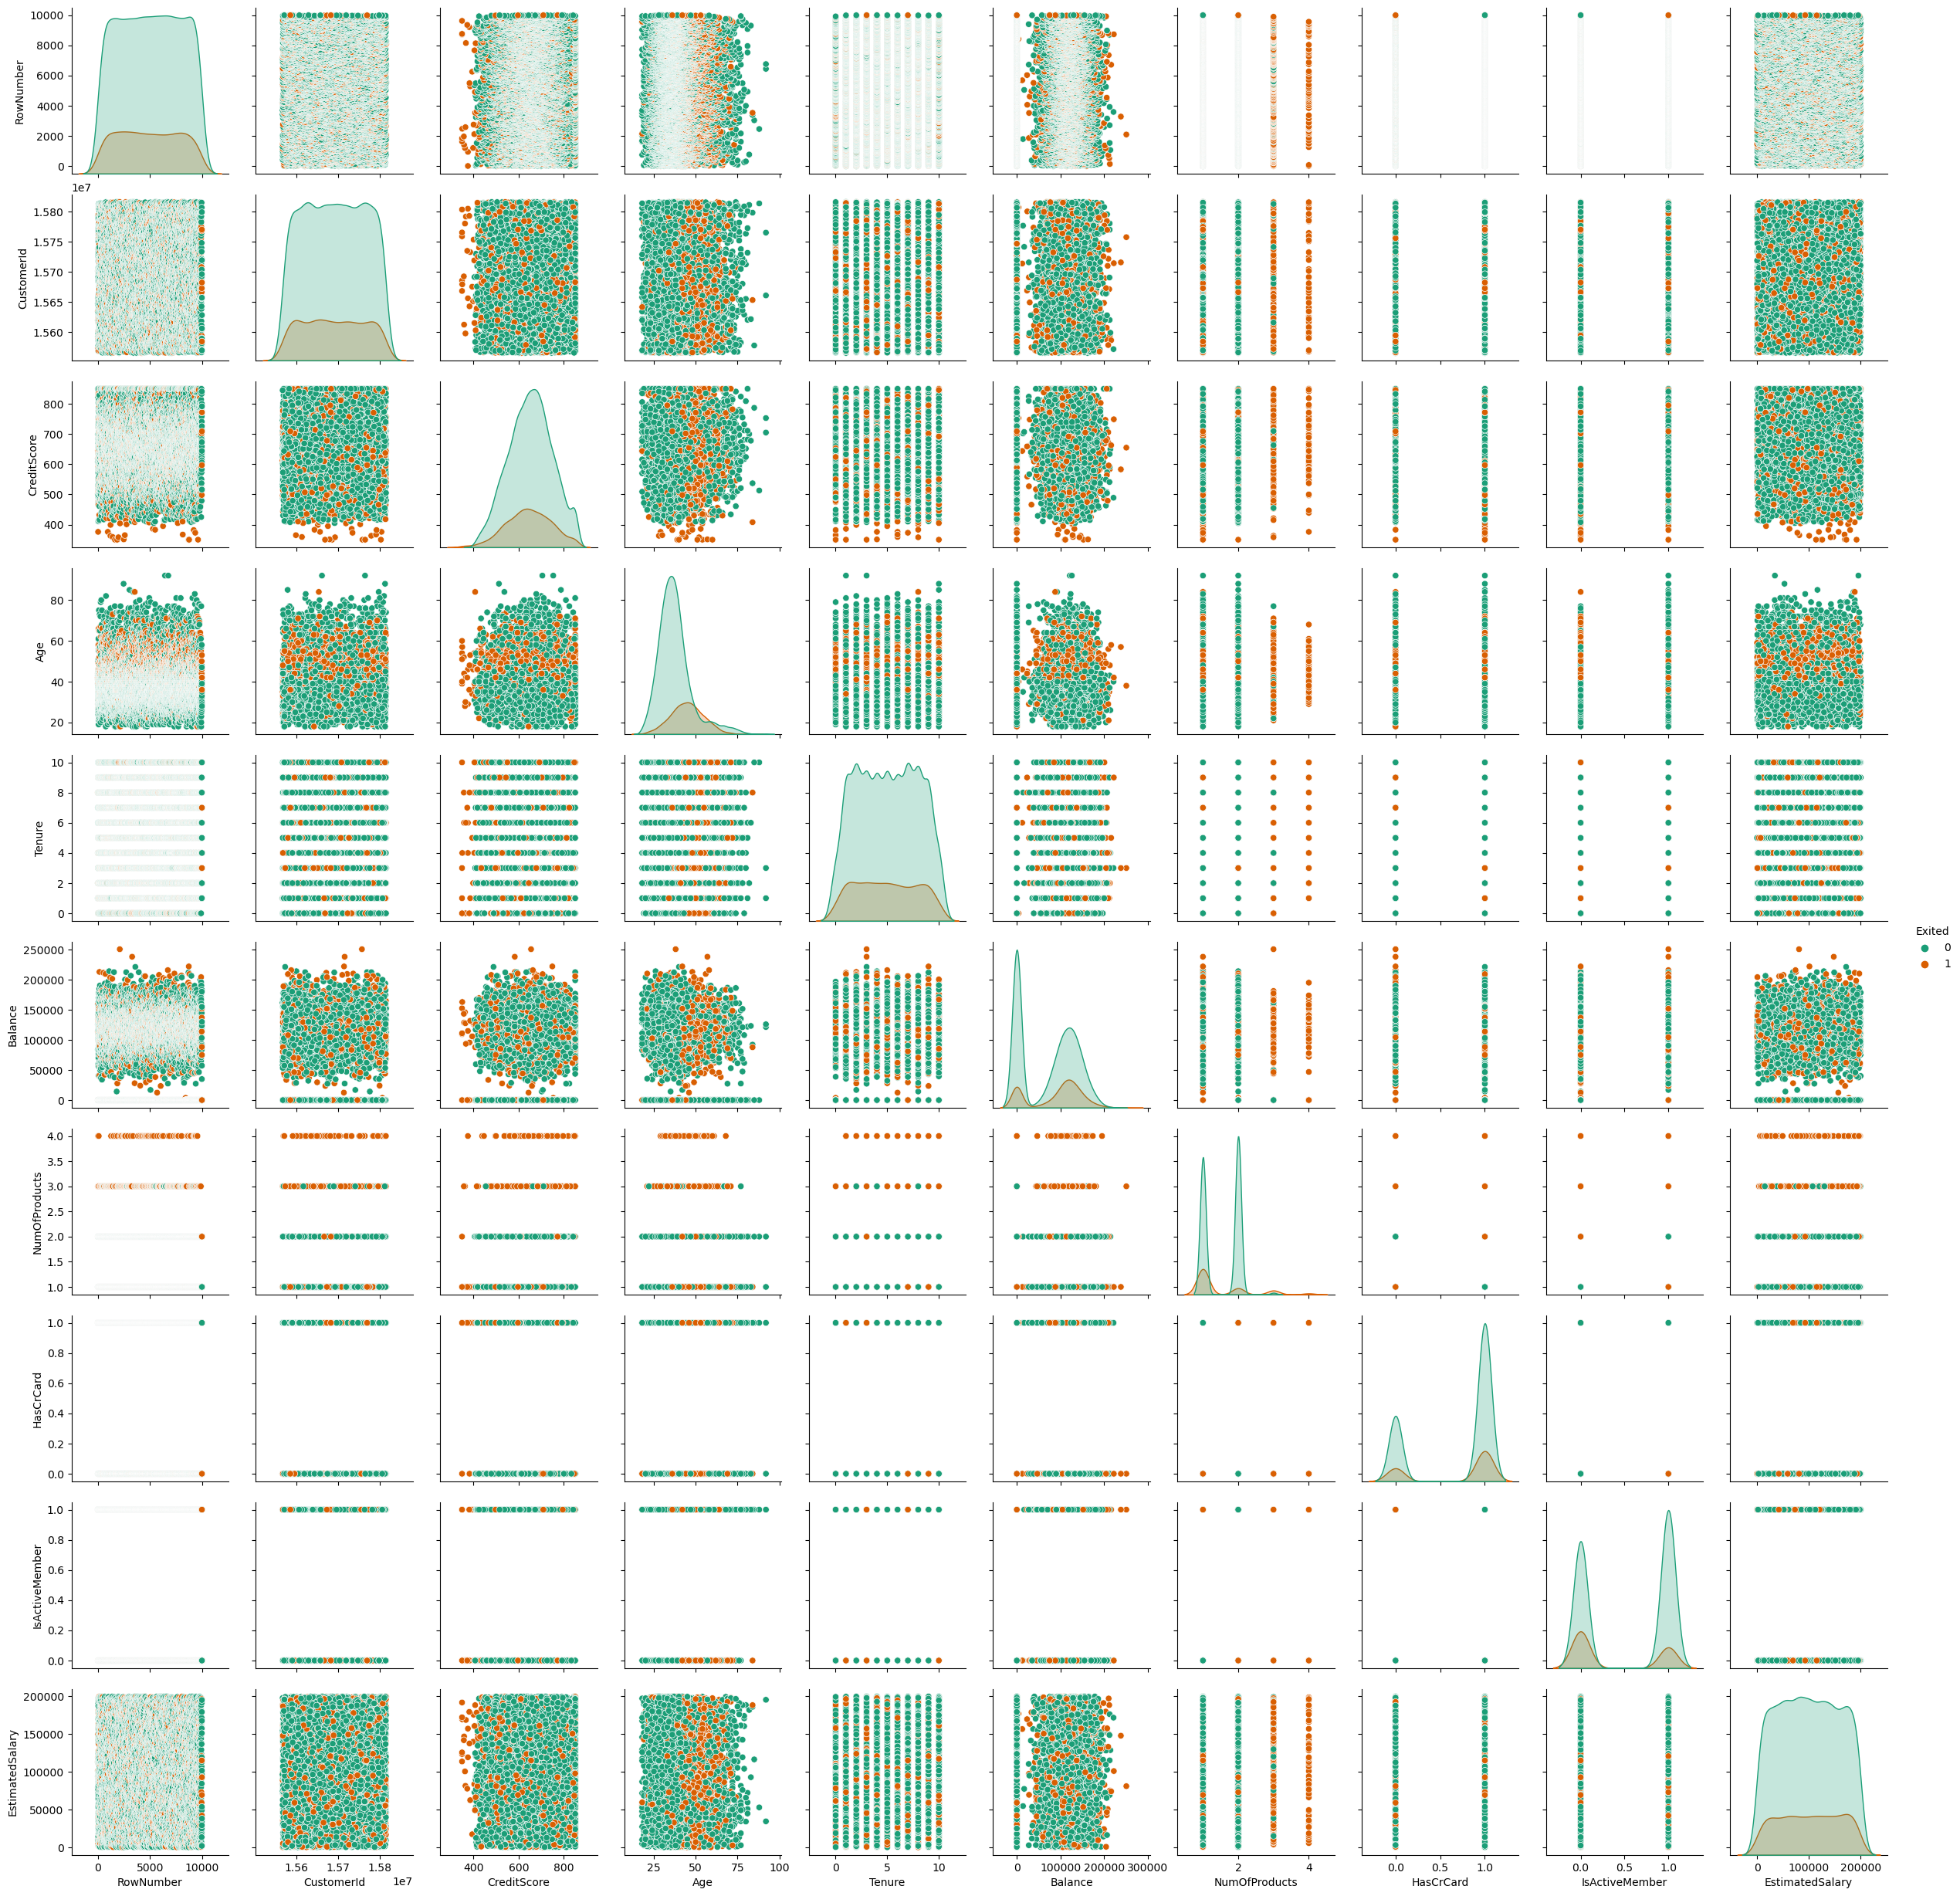

In [15]:
sns.pairplot(Data,hue='Exited',palette='Dark2')

# Encoding categorical data
* Label Encoding the "Gender" column
* One Hot Encoding the "Geography" column

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X= np.array(ct.fit_transform(X))

# Implementing Logistic Regression Model

* Spliting the data into training set and testing set
* Training and
* predicting values for the testing data
*  Creating a classification report and confusion matrix for the logestic regression model

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [23]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1595
           1       0.53      0.59      0.56       405

    accuracy                           0.81      2000
   macro avg       0.71      0.73      0.72      2000
weighted avg       0.82      0.81      0.81      2000



In [26]:
print(confusion_matrix(y_test,predictions))

[[1381  214]
 [ 167  238]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rfc = RandomForestClassifier(n_estimators=600)

In [102]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [103]:
predictions = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [105]:
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.76      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [107]:
print(confusion_matrix(y_test,predictions))

[[1529   66]
 [ 199  206]]


In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

[[1529   66]
 [ 199  206]]


0.8675

# Implementing Logistic Regression Model


In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [112]:
predictions = logmodel.predict(X_test)

In [113]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000



In [115]:
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)
    tn, fp, fn, tp = confusion_matrix(y_test_list, predicted_labels_list).ravel()
    print('specifity',tn/(fp+tn))
    print('sensitivity',tp/(tp+fn))

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix,title='Confusion matrix, without normalization')
    plt.show()

In [116]:
def generate_confusion_matrix(cnf_matrix, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are 
    
    plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
    plt.title(title)
    plt.colorbar()
    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

specifity 0.9567398119122257
sensitivity 0.23703703703703705
Confusion matrix, without normalization


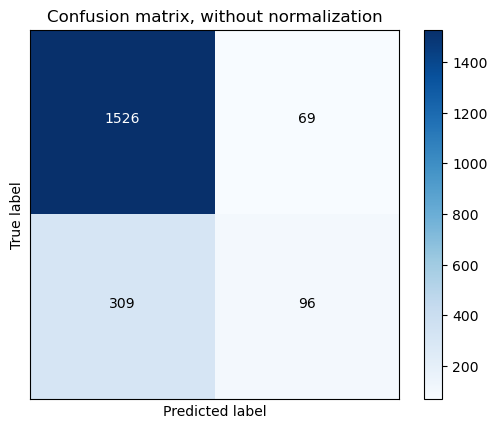

In [117]:
plot_confusion_matrix(predictions, y_test)


# Train a Support Vector Machine Classifier with SVM


**Call the SVC() model from sklearn and fit the model to the training data.**

In [118]:
from sklearn.svm import SVC

In [119]:
svc_model = SVC()

In [120]:
svc_model.fit(X_train,y_train)

SVC()

In [121]:
predictions = svc_model.predict(X_test)

In [122]:
from sklearn.metrics import classification_report,confusion_matrix

In [123]:
print(confusion_matrix(y_test,predictions))

[[1550   45]
 [ 225  180]]


In [124]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.80      0.44      0.57       405

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [127]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   2.5s
[CV] END .....................................C=0.1, gamma=1; total time=   2.5s
[CV] END .....................................C=0.1, gamma=1; total time=   2.5s
[CV] END .....................................C=0.1, gamma=1; total time=   2.5s
[CV] END .....................................C=0.1, gamma=1; total time=   2.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.1s
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.1s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [128]:
grid_predictions = grid.predict(X_test)

In [129]:
print(confusion_matrix(y_test,grid_predictions))

[[1563   32]
 [ 240  165]]


In [130]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1595
           1       0.84      0.41      0.55       405

    accuracy                           0.86      2000
   macro avg       0.85      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



# Artificial Neural Network

## Part 1 - Building the ANN

### Initializing the ANN

In [41]:
ann = tf.keras.models.Sequential()

In [42]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [43]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [44]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 2 - Training the ANN

### Compiling the ANN

In [45]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [46]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.7994
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8085
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4221 - accuracy: 0.8116
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4171 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8635
Epoch 82/100
250/250 [==============================] - 0s 951us/step - loss: 0.3411 - accuracy: 0.8651
Epoch 83/100
250/250 [==============================] - 0s 971us/step - loss: 0.3415 - accuracy: 0.8644
Epoch 84/100
250/250 [==============================] - 0s 953us/step - loss: 0.3409 - accuracy: 0.8661
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8654
Epoch 86/100
250/250 [==============================] - 0s 963us/step - loss: 0.3406 - accuracy: 0.8631
Epoch 87/100
250/250 [==============================] - 0s 960us/step - loss: 0.3400 - accuracy: 0.8635
Epoch 88/100
250/250 [==============================] - 0s 964us/step - loss: 0.3403 - accuracy: 0.8649
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3402 - accuracy: 0.8655
Epoch 90/100
250/250 [==============================] - 0s 968us/step - loss: 0.340

## Part 3- Making the predictions and evaluating the model

In [47]:
 y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 785us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1518   77]
 [ 199  206]]


0.862

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

